In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], inplace=True, axis = 1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_type = application_df.APPLICATION_TYPE.value_counts()
application_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

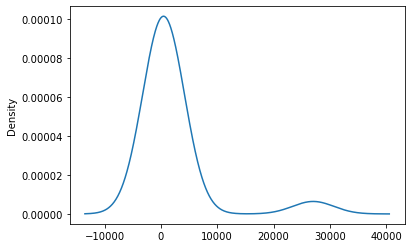

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_type.plot.density()


In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type[application_type < 400].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df.CLASSIFICATION.value_counts()
classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

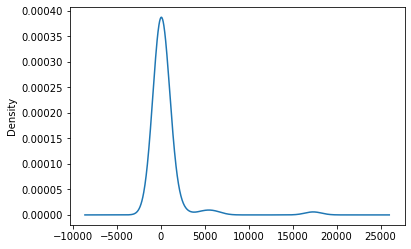

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_count.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_count[classification_count < 1600].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == 'object'].index.tolist()

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/Users/kristenmakar/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True).drop(application_cat, axis = 1)


In [13]:
application_df.head(10)

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1,5000,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1,31452,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1,7508025,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,1,94389,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Deliverable 3

In [14]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['IS_SUCCESSFUL'], axis =1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state = 78)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation ='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


2022-05-08 20:09:03.135326: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
# Compile the model
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

nn.compile(loss='binary_crossentropy', optimizer ='adam', metrics=['accuracy'])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

In [18]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=600, callbacks = [cp_callback])

Epoch 1/600
801/804 [============================>.] - ETA: 0s - loss: 0.5693 - accuracy: 0.7241
Epoch 1: saving model to checkpoints/weights.01.hdf5
804/804 [==============================] - 3s 2ms/step - loss: 0.5693 - accuracy: 0.7240
Epoch 2/600
775/804 [===========================>..] - ETA: 0s - loss: 0.5548 - accuracy: 0.7302
Epoch 2: saving model to checkpoints/weights.02.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5560 - accuracy: 0.7296
Epoch 3/600
795/804 [============================>.] - ETA: 0s - loss: 0.5524 - accuracy: 0.7314
Epoch 3: saving model to checkpoints/weights.03.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5526 - accuracy: 0.7315
Epoch 4/600
799/804 [============================>.] - ETA: 0s - loss: 0.5512 - accuracy: 0.7321
Epoch 4: saving model to checkpoints/weights.04.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5512 - accuracy: 0.7322
Epoch 5/600
784/804 [=======================

797/804 [============================>.] - ETA: 0s - loss: 0.5403 - accuracy: 0.7381
Epoch 35: saving model to checkpoints/weights.35.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5401 - accuracy: 0.7382
Epoch 36/600
784/804 [============================>.] - ETA: 0s - loss: 0.5400 - accuracy: 0.7390
Epoch 36: saving model to checkpoints/weights.36.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5401 - accuracy: 0.7390
Epoch 37/600
794/804 [============================>.] - ETA: 0s - loss: 0.5395 - accuracy: 0.7389
Epoch 37: saving model to checkpoints/weights.37.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5400 - accuracy: 0.7386
Epoch 38/600
778/804 [============================>.] - ETA: 0s - loss: 0.5401 - accuracy: 0.7388
Epoch 38: saving model to checkpoints/weights.38.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5399 - accuracy: 0.7389
Epoch 39/600
779/804 [===========================

794/804 [============================>.] - ETA: 0s - loss: 0.5370 - accuracy: 0.7404
Epoch 69: saving model to checkpoints/weights.69.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5374 - accuracy: 0.7401
Epoch 70/600
797/804 [============================>.] - ETA: 0s - loss: 0.5375 - accuracy: 0.7412
Epoch 70: saving model to checkpoints/weights.70.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5376 - accuracy: 0.7411
Epoch 71/600
804/804 [==============================] - ETA: 0s - loss: 0.5371 - accuracy: 0.7402
Epoch 71: saving model to checkpoints/weights.71.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5371 - accuracy: 0.7402
Epoch 72/600
796/804 [============================>.] - ETA: 0s - loss: 0.5374 - accuracy: 0.7403
Epoch 72: saving model to checkpoints/weights.72.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5371 - accuracy: 0.7406
Epoch 73/600
792/804 [===========================

803/804 [============================>.] - ETA: 0s - loss: 0.5354 - accuracy: 0.7413
Epoch 103: saving model to checkpoints/weights.103.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5356 - accuracy: 0.7412
Epoch 104/600
786/804 [============================>.] - ETA: 0s - loss: 0.5357 - accuracy: 0.7407
Epoch 104: saving model to checkpoints/weights.104.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5357 - accuracy: 0.7411
Epoch 105/600
788/804 [============================>.] - ETA: 0s - loss: 0.5359 - accuracy: 0.7416
Epoch 105: saving model to checkpoints/weights.105.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5354 - accuracy: 0.7418
Epoch 106/600
794/804 [============================>.] - ETA: 0s - loss: 0.5353 - accuracy: 0.7414
Epoch 106: saving model to checkpoints/weights.106.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5355 - accuracy: 0.7412
Epoch 107/600
802/804 [===============

804/804 [==============================] - 4s 5ms/step - loss: 0.5349 - accuracy: 0.7412
Epoch 137/600
796/804 [============================>.] - ETA: 0s - loss: 0.5336 - accuracy: 0.7421
Epoch 137: saving model to checkpoints/weights.137.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5344 - accuracy: 0.7415
Epoch 138/600
797/804 [============================>.] - ETA: 0s - loss: 0.5349 - accuracy: 0.7410
Epoch 138: saving model to checkpoints/weights.138.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5346 - accuracy: 0.7411
Epoch 139/600
804/804 [==============================] - ETA: 0s - loss: 0.5349 - accuracy: 0.7417
Epoch 139: saving model to checkpoints/weights.139.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5349 - accuracy: 0.7417
Epoch 140/600
799/804 [============================>.] - ETA: 0s - loss: 0.5345 - accuracy: 0.7412
Epoch 140: saving model to checkpoints/weights.140.hdf5
804/804 [===============

791/804 [============================>.] - ETA: 0s - loss: 0.5331 - accuracy: 0.7422
Epoch 170: saving model to checkpoints/weights.170.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5339 - accuracy: 0.7418
Epoch 171/600
804/804 [==============================] - ETA: 0s - loss: 0.5337 - accuracy: 0.7411
Epoch 171: saving model to checkpoints/weights.171.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5337 - accuracy: 0.7411
Epoch 172/600
804/804 [==============================] - ETA: 0s - loss: 0.5340 - accuracy: 0.7420
Epoch 172: saving model to checkpoints/weights.172.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5340 - accuracy: 0.7420
Epoch 173/600
794/804 [============================>.] - ETA: 0s - loss: 0.5339 - accuracy: 0.7417
Epoch 173: saving model to checkpoints/weights.173.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5337 - accuracy: 0.7420
Epoch 174/600
788/804 [===============

804/804 [==============================] - 1s 2ms/step - loss: 0.5334 - accuracy: 0.7418
Epoch 204/600
796/804 [============================>.] - ETA: 0s - loss: 0.5334 - accuracy: 0.7420
Epoch 204: saving model to checkpoints/weights.204.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5333 - accuracy: 0.7420
Epoch 205/600
777/804 [===========================>..] - ETA: 0s - loss: 0.5324 - accuracy: 0.7425
Epoch 205: saving model to checkpoints/weights.205.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5330 - accuracy: 0.7418
Epoch 206/600
800/804 [============================>.] - ETA: 0s - loss: 0.5330 - accuracy: 0.7420
Epoch 206: saving model to checkpoints/weights.206.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5331 - accuracy: 0.7419
Epoch 207/600
799/804 [============================>.] - ETA: 0s - loss: 0.5331 - accuracy: 0.7417
Epoch 207: saving model to checkpoints/weights.207.hdf5
804/804 [===============

796/804 [============================>.] - ETA: 0s - loss: 0.5330 - accuracy: 0.7427
Epoch 237: saving model to checkpoints/weights.237.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5331 - accuracy: 0.7425
Epoch 238/600
781/804 [============================>.] - ETA: 0s - loss: 0.5326 - accuracy: 0.7426
Epoch 238: saving model to checkpoints/weights.238.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5330 - accuracy: 0.7420
Epoch 239/600
788/804 [============================>.] - ETA: 0s - loss: 0.5324 - accuracy: 0.7424
Epoch 239: saving model to checkpoints/weights.239.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5325 - accuracy: 0.7423
Epoch 240/600
782/804 [============================>.] - ETA: 0s - loss: 0.5320 - accuracy: 0.7424
Epoch 240: saving model to checkpoints/weights.240.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5327 - accuracy: 0.7423
Epoch 241/600
782/804 [===============

804/804 [==============================] - 1s 2ms/step - loss: 0.5325 - accuracy: 0.7425
Epoch 271/600
784/804 [============================>.] - ETA: 0s - loss: 0.5313 - accuracy: 0.7430
Epoch 271: saving model to checkpoints/weights.271.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5320 - accuracy: 0.7422
Epoch 272/600
792/804 [============================>.] - ETA: 0s - loss: 0.5313 - accuracy: 0.7428
Epoch 272: saving model to checkpoints/weights.272.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5319 - accuracy: 0.7422
Epoch 273/600
802/804 [============================>.] - ETA: 0s - loss: 0.5330 - accuracy: 0.7418
Epoch 273: saving model to checkpoints/weights.273.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5326 - accuracy: 0.7421
Epoch 274/600
769/804 [===========================>..] - ETA: 0s - loss: 0.5312 - accuracy: 0.7426
Epoch 274: saving model to checkpoints/weights.274.hdf5
804/804 [===============

800/804 [============================>.] - ETA: 0s - loss: 0.5314 - accuracy: 0.7430
Epoch 304: saving model to checkpoints/weights.304.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5317 - accuracy: 0.7426
Epoch 305/600
802/804 [============================>.] - ETA: 0s - loss: 0.5316 - accuracy: 0.7424
Epoch 305: saving model to checkpoints/weights.305.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5316 - accuracy: 0.7423
Epoch 306/600
801/804 [============================>.] - ETA: 0s - loss: 0.5326 - accuracy: 0.7418
Epoch 306: saving model to checkpoints/weights.306.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5324 - accuracy: 0.7419
Epoch 307/600
801/804 [============================>.] - ETA: 0s - loss: 0.5321 - accuracy: 0.7419
Epoch 307: saving model to checkpoints/weights.307.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5317 - accuracy: 0.7421
Epoch 308/600
803/804 [===============

804/804 [==============================] - 1s 2ms/step - loss: 0.5314 - accuracy: 0.7421
Epoch 338/600
788/804 [============================>.] - ETA: 0s - loss: 0.5308 - accuracy: 0.7429
Epoch 338: saving model to checkpoints/weights.338.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5313 - accuracy: 0.7421
Epoch 339/600
772/804 [===========================>..] - ETA: 0s - loss: 0.5317 - accuracy: 0.7425
Epoch 339: saving model to checkpoints/weights.339.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5316 - accuracy: 0.7429
Epoch 340/600
786/804 [============================>.] - ETA: 0s - loss: 0.5320 - accuracy: 0.7422
Epoch 340: saving model to checkpoints/weights.340.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5314 - accuracy: 0.7428
Epoch 341/600
795/804 [============================>.] - ETA: 0s - loss: 0.5310 - accuracy: 0.7421
Epoch 341: saving model to checkpoints/weights.341.hdf5
804/804 [===============

783/804 [============================>.] - ETA: 0s - loss: 0.5314 - accuracy: 0.7423
Epoch 371: saving model to checkpoints/weights.371.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5312 - accuracy: 0.7423
Epoch 372/600
782/804 [============================>.] - ETA: 0s - loss: 0.5315 - accuracy: 0.7427
Epoch 372: saving model to checkpoints/weights.372.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5313 - accuracy: 0.7430
Epoch 373/600
789/804 [============================>.] - ETA: 0s - loss: 0.5311 - accuracy: 0.7422
Epoch 373: saving model to checkpoints/weights.373.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5314 - accuracy: 0.7423
Epoch 374/600
774/804 [===========================>..] - ETA: 0s - loss: 0.5323 - accuracy: 0.7409
Epoch 374: saving model to checkpoints/weights.374.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5310 - accuracy: 0.7420
Epoch 375/600
781/804 [===============

804/804 [==============================] - 1s 2ms/step - loss: 0.5314 - accuracy: 0.7428
Epoch 405/600
795/804 [============================>.] - ETA: 0s - loss: 0.5313 - accuracy: 0.7423
Epoch 405: saving model to checkpoints/weights.405.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5308 - accuracy: 0.7425
Epoch 406/600
777/804 [===========================>..] - ETA: 0s - loss: 0.5313 - accuracy: 0.7426
Epoch 406: saving model to checkpoints/weights.406.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5311 - accuracy: 0.7427
Epoch 407/600
791/804 [============================>.] - ETA: 0s - loss: 0.5307 - accuracy: 0.7431
Epoch 407: saving model to checkpoints/weights.407.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5308 - accuracy: 0.7428
Epoch 408/600
793/804 [============================>.] - ETA: 0s - loss: 0.5305 - accuracy: 0.7429
Epoch 408: saving model to checkpoints/weights.408.hdf5
804/804 [===============

776/804 [===========================>..] - ETA: 0s - loss: 0.5332 - accuracy: 0.7423
Epoch 438: saving model to checkpoints/weights.438.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5331 - accuracy: 0.7425
Epoch 439/600
786/804 [============================>.] - ETA: 0s - loss: 0.5305 - accuracy: 0.7432
Epoch 439: saving model to checkpoints/weights.439.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5306 - accuracy: 0.7431
Epoch 440/600
804/804 [==============================] - ETA: 0s - loss: 0.5304 - accuracy: 0.7426
Epoch 440: saving model to checkpoints/weights.440.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5304 - accuracy: 0.7426
Epoch 441/600
789/804 [============================>.] - ETA: 0s - loss: 0.5309 - accuracy: 0.7428
Epoch 441: saving model to checkpoints/weights.441.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5308 - accuracy: 0.7427
Epoch 442/600
804/804 [===============

804/804 [==============================] - 1s 2ms/step - loss: 0.5311 - accuracy: 0.7426
Epoch 472/600
793/804 [============================>.] - ETA: 0s - loss: 0.5309 - accuracy: 0.7423
Epoch 472: saving model to checkpoints/weights.472.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5307 - accuracy: 0.7424
Epoch 473/600
801/804 [============================>.] - ETA: 0s - loss: 0.5300 - accuracy: 0.7437
Epoch 473: saving model to checkpoints/weights.473.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5302 - accuracy: 0.7435
Epoch 474/600
803/804 [============================>.] - ETA: 0s - loss: 0.5302 - accuracy: 0.7431
Epoch 474: saving model to checkpoints/weights.474.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5304 - accuracy: 0.7430
Epoch 475/600
796/804 [============================>.] - ETA: 0s - loss: 0.5306 - accuracy: 0.7429
Epoch 475: saving model to checkpoints/weights.475.hdf5
804/804 [===============

794/804 [============================>.] - ETA: 0s - loss: 0.5302 - accuracy: 0.7430
Epoch 505: saving model to checkpoints/weights.505.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5301 - accuracy: 0.7431
Epoch 506/600
798/804 [============================>.] - ETA: 0s - loss: 0.5298 - accuracy: 0.7430
Epoch 506: saving model to checkpoints/weights.506.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5302 - accuracy: 0.7426
Epoch 507/600
802/804 [============================>.] - ETA: 0s - loss: 0.5297 - accuracy: 0.7430
Epoch 507: saving model to checkpoints/weights.507.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5299 - accuracy: 0.7429
Epoch 508/600
786/804 [============================>.] - ETA: 0s - loss: 0.5304 - accuracy: 0.7434
Epoch 508: saving model to checkpoints/weights.508.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5304 - accuracy: 0.7429
Epoch 509/600
792/804 [===============

804/804 [==============================] - 2s 2ms/step - loss: 0.5300 - accuracy: 0.7435
Epoch 539/600
792/804 [============================>.] - ETA: 0s - loss: 0.5298 - accuracy: 0.7435
Epoch 539: saving model to checkpoints/weights.539.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5300 - accuracy: 0.7434
Epoch 540/600
781/804 [============================>.] - ETA: 0s - loss: 0.5306 - accuracy: 0.7428
Epoch 540: saving model to checkpoints/weights.540.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5297 - accuracy: 0.7432
Epoch 541/600
780/804 [============================>.] - ETA: 0s - loss: 0.5297 - accuracy: 0.7430
Epoch 541: saving model to checkpoints/weights.541.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5298 - accuracy: 0.7432
Epoch 542/600
792/804 [============================>.] - ETA: 0s - loss: 0.5307 - accuracy: 0.7433
Epoch 542: saving model to checkpoints/weights.542.hdf5
804/804 [===============

797/804 [============================>.] - ETA: 0s - loss: 0.5292 - accuracy: 0.7435
Epoch 572: saving model to checkpoints/weights.572.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5296 - accuracy: 0.7432
Epoch 573/600
797/804 [============================>.] - ETA: 0s - loss: 0.5306 - accuracy: 0.7426
Epoch 573: saving model to checkpoints/weights.573.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5305 - accuracy: 0.7428
Epoch 574/600
789/804 [============================>.] - ETA: 0s - loss: 0.5297 - accuracy: 0.7433
Epoch 574: saving model to checkpoints/weights.574.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5298 - accuracy: 0.7434
Epoch 575/600
788/804 [============================>.] - ETA: 0s - loss: 0.5295 - accuracy: 0.7437
Epoch 575: saving model to checkpoints/weights.575.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5297 - accuracy: 0.7436
Epoch 576/600
789/804 [===============

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5874 - accuracy: 0.7262 - 495ms/epoch - 2ms/step
Loss: 0.5873638987541199, Accuracy: 0.7261807322502136


In [20]:
nn.save('AlphabetSoupCharity_Optimization.h5')